In [1]:
import pandas as pd 
import os 
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report


In [2]:
data=r"D:\VAMSI\CSE_PROJECTS\Aishwarya\vitamin-deficiency-detection-master\Backend\dataset\new_train"
import os
for file in os.listdir(data):
    print(file)

Acral Lentiginous Melanoma
Beaus Line
Blue Finger
Clubbing
Koilonychia
Lindsay-s Nail
lip_and_tongue
Muehrckes Lines
Onychogryphosis
Pitting
Terry-s Nail


In [5]:
Categories=['Acral Lentiginous Melanoma','Beaus Line',"Blue Finger","Clubbing","Koilonychia",
			"Lindsay-s Nail","lip_and_tongue","Muehrckes Lines","Onychogryphosis","Pitting","Terry-s Nail"] 
flat_data_arr=[] #input array 
target_arr=[] #output array 
datadir=r"D:\VAMSI\CSE_PROJECTS\Aishwarya\vitamin-deficiency-detection-master\Backend\dataset\new_train"

#path which contains all the categories of images 
for i in Categories: 
	
	print(f'loading... category : {i}') 
	path=os.path.join(datadir,i) 
	for img in os.listdir(path): 
		img_array=imread(os.path.join(path,img)) 
		img_resized=resize(img_array,(150,150,3)) 
		flat_data_arr.append(img_resized.flatten()) 
		target_arr.append(Categories.index(i)) 
	print(f'loaded category:{i} successfully') 
flat_data=np.array(flat_data_arr) 
target=np.array(target_arr)


loading... category : Acral Lentiginous Melanoma
loaded category:Acral Lentiginous Melanoma successfully
loading... category : Beaus Line
loaded category:Beaus Line successfully
loading... category : Blue Finger
loaded category:Blue Finger successfully
loading... category : Clubbing
loaded category:Clubbing successfully
loading... category : Koilonychia
loaded category:Koilonychia successfully
loading... category : Lindsay-s Nail
loaded category:Lindsay-s Nail successfully
loading... category : lip_and_tongue


c:\Users\0258\.conda\envs\deepfake\lib\site-packages\PIL\TiffImagePlugin.py:819: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


loaded category:lip_and_tongue successfully
loading... category : Muehrckes Lines
loaded category:Muehrckes Lines successfully
loading... category : Onychogryphosis
loaded category:Onychogryphosis successfully
loading... category : Pitting
loaded category:Pitting successfully
loading... category : Terry-s Nail
loaded category:Terry-s Nail successfully


In [6]:
#dataframe 
df=pd.DataFrame(flat_data) 
df['Target']=target 
df.shape


(394, 67501)

In [7]:
#input data 
x=df.iloc[:,:-1] 
#output data 
y=df.iloc[:,-1]


In [9]:
# Splitting the data into training and testing sets 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, 
											random_state=77) 


In [10]:
# Defining the parameters grid for GridSearchCV 
param_grid={'C':[0.1,1,10,100], 
			'gamma':[0.0001,0.001,0.1,1], 
			'kernel':['rbf','poly']} 

# Creating a support vector classifier 
svc=svm.SVC(probability=True) 

# Creating a model using GridSearchCV with the parameters grid 
model=GridSearchCV(svc,param_grid)


In [11]:
# Training the model using the training data 
model.fit(x_train,y_train)


c:\Users\0258\.conda\envs\deepfake\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [12]:
# Testing the model using the testing data 
y_pred = model.predict(x_test) 

# Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test) 

# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")


The model is 44.303797468354425% accurate


In [27]:
# Display the best parameters found during the grid search
print("Best parameters:", model.best_params_)

Best parameters: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [29]:
# Save the trained model
import joblib
joblib.dump(model, 'svm_model.pkl')

['svm_model.pkl']

In [15]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.29      0.29      0.29         7
           2       0.55      0.75      0.63         8
           3       0.55      0.46      0.50        13
           4       0.25      0.25      0.25         4
           6       0.89      1.00      0.94         8
           7       1.00      0.17      0.29         6
           8       0.57      0.50      0.53         8
           9       0.18      0.50      0.27         4
          10       0.38      0.45      0.42        11

    accuracy                           0.44        79
   macro avg       0.47      0.44      0.41        79
weighted avg       0.47      0.44      0.43        79



In [22]:
import h5py
from sklearn import svm
from sklearn.model_selection import GridSearchCV


In [24]:
# Save the trained model in HDF5 format
with h5py.File('svm_model.h5', 'w') as hdf:
    for key in model.best_estimator_.__dict__:
        if isinstance(model.best_estimator_.__dict__[key], str):
            hdf.create_dataset(key, data=model.best_estimator_.__dict__[key])


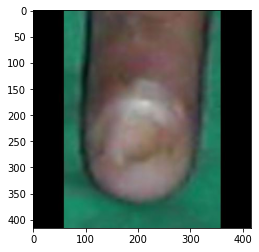

Acral Lentiginous Melanoma = 16.12953550635961%
Beaus Line = 6.253186450328911%
Blue Finger = 10.212776826875897%
Clubbing = 13.89740259901313%
Koilonychia = 23.884708192879774%
Lindsay-s Nail = 0.8385228595346399%
lip_and_tongue = 0.6904212167939373%
Muehrckes Lines = 7.020743773048835%
Onychogryphosis = 10.358347930987966%
Pitting = 4.769157945459471%
Terry-s Nail = 5.945196698717815%
The predicted image is : Koilonychia


In [26]:
path=r'dataset\new_train\Koilonychia\k104_png.rf.1cba9870b4201008494074f864ebf0e5.jpg'
img=imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 
probability=model.predict_proba(l) 
for ind,val in enumerate(Categories): 
	print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+Categories[model.predict(l)[0]])
